In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from utils import scale_up_mask, get_bounding_boxes, crop_image_with_boxes

In [19]:
im_path = 'test_data/sec_75-81/Sec_75-81_8um_per_pix.tif'
mask_path = 'test_data/sec_75-81/Sec_75-81_cp_masks.tif'

im = np.array(Image.open(im_path))
mask_downsized = np.array(Image.open(mask_path))

In [20]:
mask = scale_up_mask(mask_downsized, scale=20, ref=im)

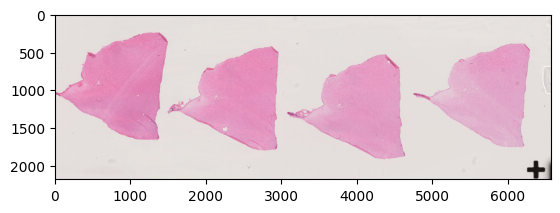

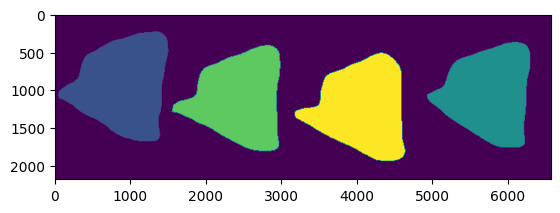

In [21]:
plt.imshow(im)
plt.show()
plt.imshow(mask)
plt.show()

In [22]:
# obtain the bounding boxes and crop the RGB images
boxes = get_bounding_boxes(mask, margin=50)
cropped_imgs = crop_image_with_boxes(im, boxes, mask)

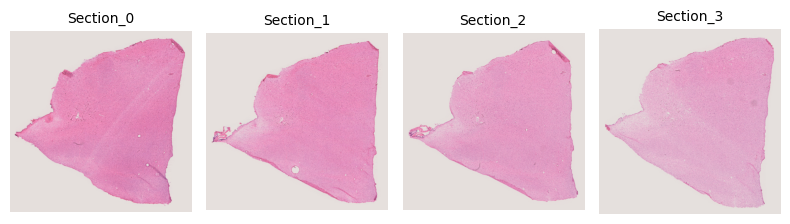

In [23]:
# plot
n = len(cropped_imgs)
fig, axes = plt.subplots(1, n, figsize=(8, 8*n), squeeze=False)

slide_num = 0
for ax, (obj_id, crop) in zip(axes.ravel(), cropped_imgs.items()):
    ax.imshow(crop)
    ax.set_title(f'Section_{slide_num}', fontsize=10)
    ax.axis('off')
    slide_num += 1

plt.tight_layout()
plt.show()

In [24]:
# save image:
n = len(cropped_imgs)
outpath = 'test_data/cropped_sections'

if not os.path.exists(outpath):
    os.mkdir(outpath)

for num, i in enumerate(cropped_imgs):
    name = f"crop_{num}.tif"
    outpath_full = os.path.join(outpath, name)
    print(outpath_full)
    im = Image.fromarray(cropped_imgs[i])
    im.save(outpath_full)

test_data/cropped_sections/crop_0.tif
test_data/cropped_sections/crop_1.tif
test_data/cropped_sections/crop_2.tif
test_data/cropped_sections/crop_3.tif
